## Points of Dispense Analysis 2

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')
bg_included = pd.read_csv('data/bg_pop_included.csv')
pods = pd.read_csv('data/POD_ids.csv')

In [3]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [4]:
dist = dist_miles.values
N = population['population'].values
prop = bg_included['all_included'].values

In [5]:
infile = open('pods_open_total2','rb')
pods_total = pickle.load(infile)
infile.close()

In [6]:
infile = open('pods_open_minmax2','rb')
pods_minmax = pickle.load(infile)
infile.close()

In [7]:
infile = open('pods_flood_total2','rb')
pods_flood_total2 = pickle.load(infile)
infile.close()

In [8]:
infile = open('pods_flood_minmax2','rb')
pods_flood_minmax2 = pickle.load(infile)
infile.close()

In [9]:
infile = open('pods_anthrax_total','rb')
pods_anthrax_total = pickle.load(infile)
infile.close()

In [10]:
infile = open('pods_anthrax_minmax2','rb')
pods_anthrax_minmax2 = pickle.load(infile)
infile.close()

### Population

#### Analysis of population served by each POD in global model (disease outbreak)

#### Minimize total distance model

In [11]:
population.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,flood,anthrax,global
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,0,1.0,1
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,0,1.0,1
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,0,0.9,1
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,0,0.7,1
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,0,1.0,1


In [12]:
# set number of pods to open (10-47)
num_pods_open = 19

In [13]:
#Merge population and pod data frames
pods_open_total = pd.DataFrame(pods_total[num_pods_open])
pods_open_total.columns = ["bg","pod"]

pods_open_total['bg'] = pods_open_total['bg'] + 1
pods_open_total['pod'] = pods_open_total['pod'] + 1

pods_open_total = pd.merge(population,
                     pods_open_total,
                     left_on = 'bg_id',
                     right_on = 'bg',
                     how = 'left')

In [ ]:
# export pods open DataFrame to csv
pods_open_total.to_csv ('data/total_19PODs_BGassignment.csv', index = False, header=True)

pods_open_total.head()

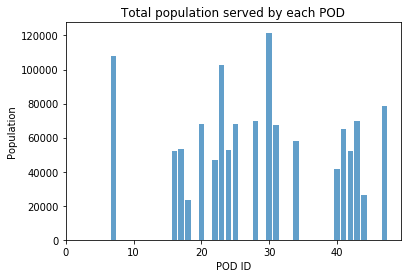

The average number of people served by a POD is 64,532


In [14]:
pods_open_total = pods_open_total.groupby("pod").population.sum().reset_index()

plt.bar(pods_open_total['pod'], pods_open_total['population'],align='center', alpha=0.7)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.xlim(0)
plt.title('Total population served by each POD')
plt.show()

print("The average number of people served by a POD is",  "{:,.0f}".format(np.average(pods_open_total['population'])))

In [ ]:
pods_open_total.to_csv ('data/total_19PODs_popbypod.csv', index = False, header=True)

pods_open_total

#### Minimize maximum distance model

In [15]:
#Merge population and pod data frames
pods_open_minmax = pd.DataFrame(pods_minmax[num_pods_open])
pods_open_minmax.columns = ["bg","pod"]

pods_open_minmax['bg'] = pods_open_minmax['bg'] + 1
pods_open_minmax['pod'] = pods_open_minmax['pod'] + 1

pods_open_minmax = pd.merge(population,
                     pods_open_minmax,
                     left_on = 'bg_id',
                     right_on = 'bg',
                     how = 'left')

In [ ]:
#export pods open DataFrame to csv
pods_open_minmax.to_csv ('data/minmax_19PODs_BGassignment.csv', index = False, header=True)

pods_open_minmax.head()

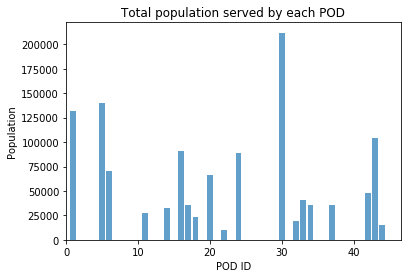

The average number of people served by a POD is 64,532


In [16]:
pods_open_minmax = pods_open_minmax.groupby("pod").population.sum().reset_index()

plt.bar(pods_open_minmax['pod'], pods_open_minmax['population'],align='center', alpha=0.7)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.xlim(0)
plt.title('Total population served by each POD')
plt.show()

print("The average number of people served by a POD is",  "{:,.0f}".format(np.average(pods_open_minmax['population'])))

In [ ]:
#export data to csv
pods_open_minmax.to_csv ('data/minmax_19PODs_popbypod.csv', index = False, header=True)

pods_open_minmax

### Number of cars and distance between block group and PODs

Analysis on number of households with no car and distance between block group and 
avg distance between POD and its selected BGs

In [48]:
pods_open = pd.DataFrame(pods_total[num_pods_open])
pods_open.columns = ["bg","pod"]

pods_open.head()

,bg,pod
0,0,6
1,1,6
2,2,30
3,3,30
4,4,27


In [49]:
bg_pod_dist = []
    
for i in np.arange(0,len(pods_open_car)):    
    bg_pod_dist.append(dist_miles.iloc[pods_open.iloc[i,0],(pods_open.iloc[i,1]-1)])



bg_pod_dist = pd.merge(pods_open, 
                pd.DataFrame(bg_pod_dist), 
                left_index=True, 
                right_index=True)

bg_pod_dist.columns = ["bg","pod","distance"]

In [50]:
bg_pod_dist = pd.merge(population,
                bg_pod_dist,
                left_on = 'bg_id',
                right_on = 'bg',
                how = 'left')

# calculate proportion of households with no car
bg_pod_dist['prop_hh_no_car'] = bg_pod_dist['hh_no_car']/bg_pod_dist['num_hhs']
bg_pod_dist.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,flood,anthrax,global,bg,pod,distance,prop_hh_no_car
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,0,1.0,1,1.0,6.0,7.226126,NaN
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,0,1.0,1,2.0,30.0,4.539034,NaN
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,0,0.9,1,3.0,30.0,4.544865,0.276596
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,0,0.7,1,4.0,27.0,12.424889,0.324022
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,0,1.0,1,5.0,27.0,12.585658,0.135447


     pod  hh_no_car
0    7.0       7220
1   16.0       1533
2   17.0       1206
3   18.0        935
4   20.0       5249
5   22.0       1144
6   23.0       4568
7   24.0        429
8   25.0       1669
9   28.0       6694
10  30.0      14589
11  31.0       6689
12  34.0       2051
13  40.0       2390
14  41.0       4620
15  42.0       1643
16  43.0       1679
17  44.0        335
18  47.0       6506


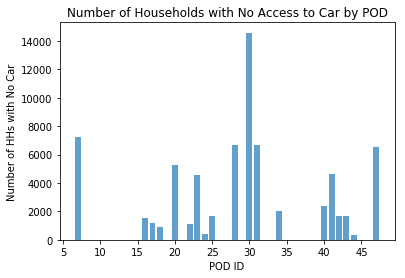

The total number of households with no car is 71,149
The average number of households with no car is 3,745
Of these PODs, POD X has the highest number of households with no car: 14,589
Of these PODs, POD X has the lowest number of households with no car is 335


In [52]:
pod_no_car = bg_pod_dist.groupby("pod").hh_no_car.sum().reset_index()
pod_no_car['pod'] = pod_no_car['pod'] + 1 
print(pod_no_car)

plt.bar(pod_no_car['pod'], pod_no_car['hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Number of HHs with No Car')
plt.xlabel('POD ID')
plt.title('Number of Households with No Access to Car by POD')
plt.show()



print("The total number of households with no car is",  "{:,.0f}".format(np.sum(pod_no_car['hh_no_car'])))
print("The average number of households with no car is",  "{:,.0f}".format(np.average(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the highest number of households with no car:",  "{:,.0f}".format(np.max(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the lowest number of households with no car is",  "{:,.0f}".format(np.min(pod_no_car['hh_no_car'])))

     pod  prop_hh_no_car
0    7.0        0.164668
1   16.0        0.065507
2   17.0        0.051702
3   18.0        0.082905
4   20.0        0.174892
5   22.0        0.067994
6   23.0        0.098711
7   24.0        0.025411
8   25.0        0.053452
9   28.0        0.195739
10  30.0        0.265113
11  31.0        0.238218
12  34.0        0.080625
13  40.0        0.155725
14  41.0        0.175175
15  42.0        0.079074
16  43.0        0.057608
17  44.0        0.030155
18  47.0        0.188406


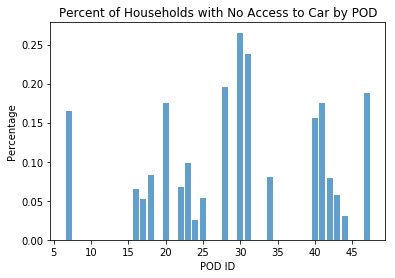

Average percentage of households with no car is 0.12 .
The POD with the highest percentage of households with no car is 0.27 by POD X.
The POD with the lowest percentage of households with no car is 0.03 by POD X.


In [53]:
pod_prop_no_car = bg_pod_dist.groupby("pod").prop_hh_no_car.mean().reset_index()
pod_prop_no_car['pod'] = pod_prop_no_car['pod'] + 1 
print(pod_prop_no_car)

plt.bar(pod_prop_no_car['pod'], pod_prop_no_car['prop_hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Percentage')
plt.xlabel('POD ID')
plt.title('Percent of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("Average percentage of households with no car is",  "{:,.2f}".format(np.average(pod_prop_no_car['prop_hh_no_car'])), ".")
print("The POD with the highest percentage of households with no car is",  "{:,.2f}".format(np.max(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")
print("The POD with the lowest percentage of households with no car is",  "{:,.2f}".format(np.min(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")

In [ ]:
pod_dist = bg_pod_dist.groupby("pod").distance.mean().reset_index()
print(pod_dist)

plt.bar(pod_dist['pod'], pod_dist['distance'],align='center', alpha=0.7)
plt.ylabel('Distance (miles)')
plt.xlabel('POD ID')
plt.title('Average Distance between POD and Assigned Block Groups (Miles)')
plt.show()

# add POD id #
print("The average distance between a POD and Block Group is",  "{:,.2f}".format(np.average(pod_dist["distance"])), "miles")
print("POD X has the lowest average distance between POD and block group at",  "{:,.2f}".format(np.min(pod_dist["distance"])), "miles")
print("POD X has the highest average distance between POD and block group at",  "{:,.2f}".format(np.max(pod_dist["distance"])), "miles")


### POD capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())